# L96-EBM Tipping Points
In this notebook we determine the tipping points of the L96-EBM.

## Imports

In [1]:
# Assume we're running from project root
%cd .. 

/Users/cfn18/Documents/PhD-Work/Thesis-Computing/Determinisitc/l96_ebm_boundary_crisis


In [7]:
# Local imports
# from src.foo import bar

# Personal Pacakge imports
from l96_ebm.deterministic.integrator import L96_EBM_Integrator, L96_EBM_TrajectoryObserver
from l96_ebm.plot.utils import init_2d_fax

# Standard Package imports
from pathlib import Path
import numpy as np

## Plot/Data Locations

In [3]:
plot_pd = Path('plots')
data_pd = Path('data')
config_pd = Path('cfg')

## Determining Tipping Points

### Determine where W attractor disappears

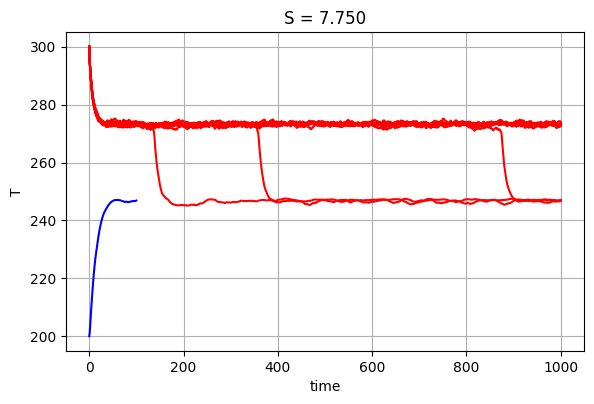

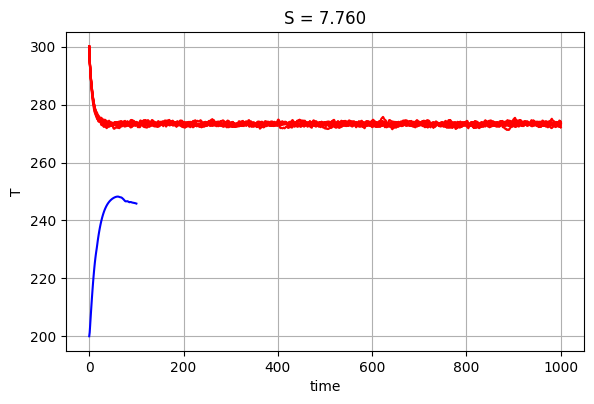

In [27]:
for S in [7.75, 7.76]:
    fig, ax = init_2d_fax()

    # Simulation starting from SB IC
    runner = L96_EBM_Integrator(T_ic = sb_T_ic, S=S)
    runner.time = 0
    looker = L96_EBM_TrajectoryObserver(runner)
    looker.make_observations(100, 1, timer=False)
    looker.observations.T.plot(c='b', ax=ax)
    looker.wipe()
    
    for i in range(10):
        # Simulation starting from W IC
        runner = L96_EBM_Integrator(T_ic = w_T_ic, S=S)
        runner.time = 0
        looker = L96_EBM_TrajectoryObserver(runner)
        looker.make_observations(1000, 1, timer=False)
        looker.observations.T.plot(c='r', ax=ax)
        looker.wipe()

    ax.set_title(f'S = {S:.3f}')

### Determine where SB attractor disappears

In [31]:
for S in [15.2, 15.3]:
    fig, ax = init_2d_fax()

    for i in range(5):
        # Simulation starting from SB IC
        runner = L96_EBM_Integrator(T_ic = sb_T_ic, S=S)
        runner.time = 0
        looker = L96_EBM_TrajectoryObserver(runner)
        looker.make_observations(1000, 1, timer=False)
        looker.observations.T.plot(c='b', ax=ax)
        looker.wipe()
    
    # Simulation starting from W IC
    runner = L96_EBM_Integrator(T_ic = w_T_ic, S=S)
    runner.time = 0
    looker = L96_EBM_TrajectoryObserver(runner)
    looker.make_observations(100, 1, timer=False)
    looker.observations.T.plot(c='r', ax=ax)
    looker.wipe()

    ax.set_title(f'S = {S:.3f}')